https://fivethirtyeight.com/features/can-you-flip-your-way-to-freedom/

## Express

It's a tetrahedron.

## Classic

Let's say each person flips if the random value is less than the cutoff $c$. What's the chance of being released?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import scipy

In [2]:
def prob_release(cutoff, n_prisoners):
    #c = np.array(c)
    prob_flip = np.zeros(n_prisoners+1)
    prob_release = 0
    for i in range(n_prisoners+1):
        prob_flip[i] = stats.binom(n_prisoners, cutoff).pmf(i)
        if i > 0:
            prob_release += prob_flip[i] * 0.5**i
    return prob_release

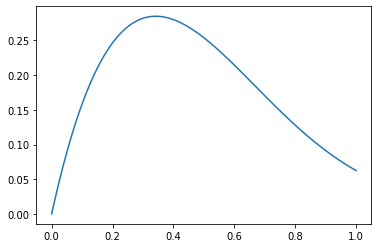

In [3]:
fig, ax = plt.subplots()
release = []
cs = np.linspace(0.0, 1.0, 101)
for x in cs:
    release.append(prob_release(x, 4))
ax.plot(cs, release)

In [4]:
cs[np.argmax(release)]

0.34

In [5]:
np.max(release)

0.28483585000000006

In [6]:
-scipy.optimize.minimize_scalar(lambda x: -prob_release(x, 4),
                                bounds=(0., 1.),
                                method='bounded')['fun']

0.2848423689176055

So that's the answer, a 28% change of release.

What about with more prisoners?

In [7]:
ns_prisoners = range(1, 51)
probs = []
for i in ns_prisoners:
    probs.append(-scipy.optimize.minimize_scalar(lambda x: -prob_release(x, i),
                                                 bounds=(0., 1.),
                                                 method='bounded')['fun'])

Text(0, 0.5, 'prob of release')

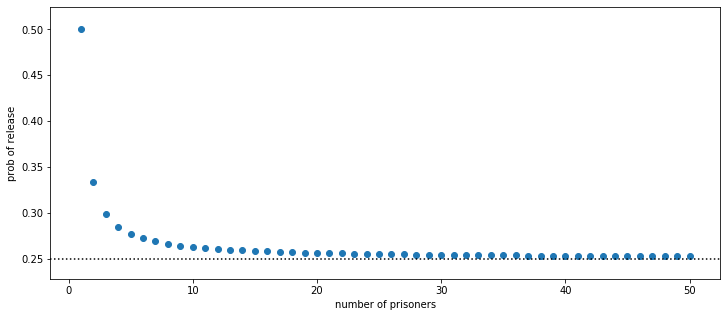

In [8]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.scatter(ns_prisoners, probs)
ax.axhline(0.25, c='k', ls=':')
ax.set_xlabel('number of prisoners')
ax.set_ylabel('prob of release')
#ax.set_ylim(0, 0.51)

The dotted line is where I assume it converges.